# Churn Prediction Using Artifical Neural Network

Name : Happy Trianna\
Batch : FTDS-RMT-018

## Objective

- Menganalisis karakteristik dari customer suatu toko online
- Menganalisis distribusi customer yang berisiko melakukan churn atau tidak
- Mengembangkan model ANN untuk memprediksi resiko customer melakukan churn

## Data

Data yang digunakan adalah data churn yang didapat dari `github.com`

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
import outlier_func
import tensorflow as tf

# Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model Evaluation of test-set
from sklearn.metrics import classification_report

# Functional Model
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

## Data Loading

In [175]:
# Read the data as df
df_ori = pd.read_csv('m1/churn.csv')
df=df_ori.copy()

# viewing the head of the data
df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [3]:
# viewing the tail of the data
df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [4]:
# Viewing the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

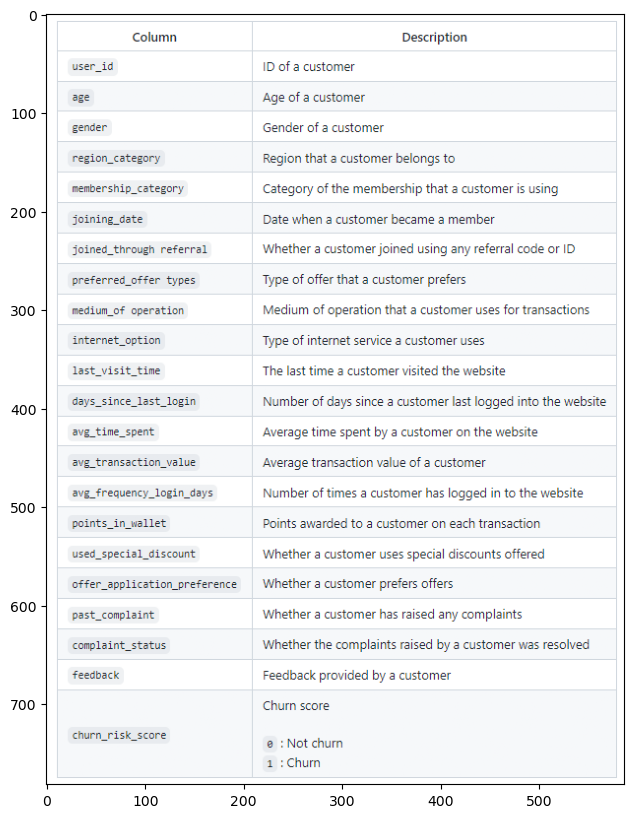

In [5]:
# Viewing the metadata we get from github
plt.figure(figsize=(15,10))
image1 = mpimg.imread("m1/img.png")
plt.imshow(image1)

In [6]:
# Change the joining date data type into datetime
df['joining_date']=pd.to_datetime(df['joining_date'])

## Exploratory Data Analysis

In [7]:
# short describe of the customers
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Ada `nilai yang negatif pada kolom days_since_last_login`. Tidak ada informasi yang cukup untuk mendefinisikan nilai negatif pada kolom tersebut. Nilai -999 dapat mengganggu eda, sehingga nilai ini akan didefinisikan sebagai missing value dan `di-impute menggunakan NaN`.

In [9]:
# Impute -999 as nan
df['days_since_last_login'].replace(-999,np.nan, inplace=True)

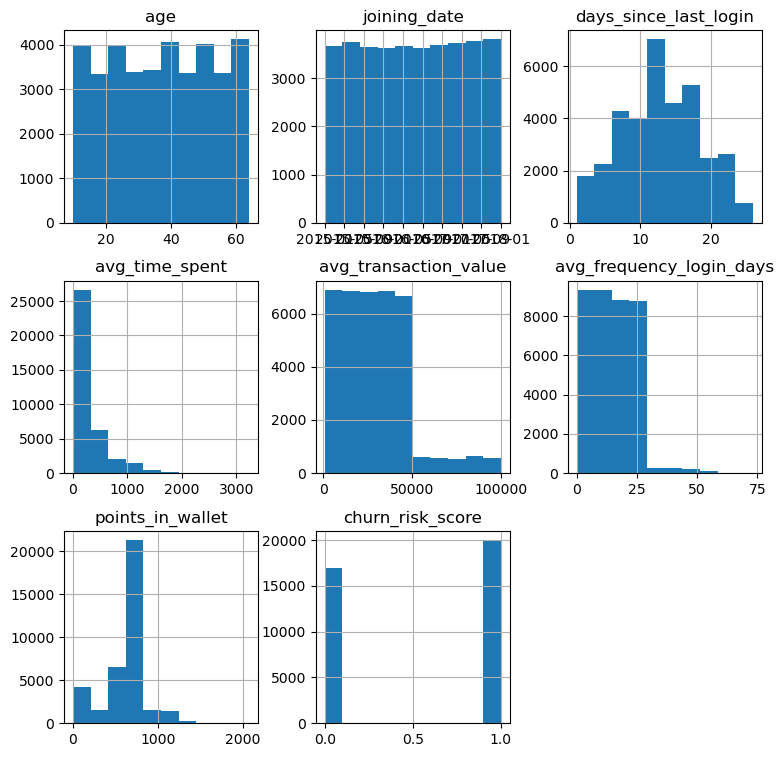

In [11]:
# Histogram plot of the numerical data
df.hist(figsize = (9,9))
plt.show()

- Kolom joining date tidak memiliki pola musiman ataupun trend
- Churn risk score adalah kolom categorical yang sudah terencode
- Selain kolom days_since_last_login yang memiliki distribusi normal, kolom lainnya memiliki distribusi yang miring

In [183]:
# Check duplicated data
df.duplicated(keep=False).shape

(37010,)

Size data yang tidak terduplikasi sama dengan jumlah data sehingga dapat dikatakan bahwa `tidak ada data yang terduplikasi`.

In [12]:
# Viewing all the unique values in categorical dtype
for i in (df.select_dtypes(include='object').columns[1:]):
    print (i, ":",df[i].unique())
    print ("Count of Unique Values :",df[i].nunique(),'\n')

gender : ['F' 'M' nan]
Count of Unique Values : 2 

region_category : [nan 'City' 'Village' 'Town']
Count of Unique Values : 3 

membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership']
Count of Unique Values : 6 

joined_through_referral : ['Yes' nan 'No']
Count of Unique Values : 2 

preferred_offer_types : ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan]
Count of Unique Values : 3 

medium_of_operation : [nan 'Desktop' 'Smartphone' 'Both']
Count of Unique Values : 3 

internet_option : ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']
Count of Unique Values : 3 

last_visit_time : ['22:29:49' '15:44:56' '20:31:53' ... '09:32:50' '02:28:52' '17:50:38']
Count of Unique Values : 30101 

used_special_discount : ['Yes' 'No']
Count of Unique Values : 2 

offer_application_preference : ['Yes' 'No']
Count of Unique Values : 2 

past_complaint : ['Yes' 'No']
Count of Unique Values : 2 

complaint

`Last visit time memiliki cardinality yang tinggi`, selanjutnya akan dicek apakah ada pola musiman yang bisa diambil dari feature ini.

Text(0.5, 1.0, 'Pattern per Minute of last_visit_time')

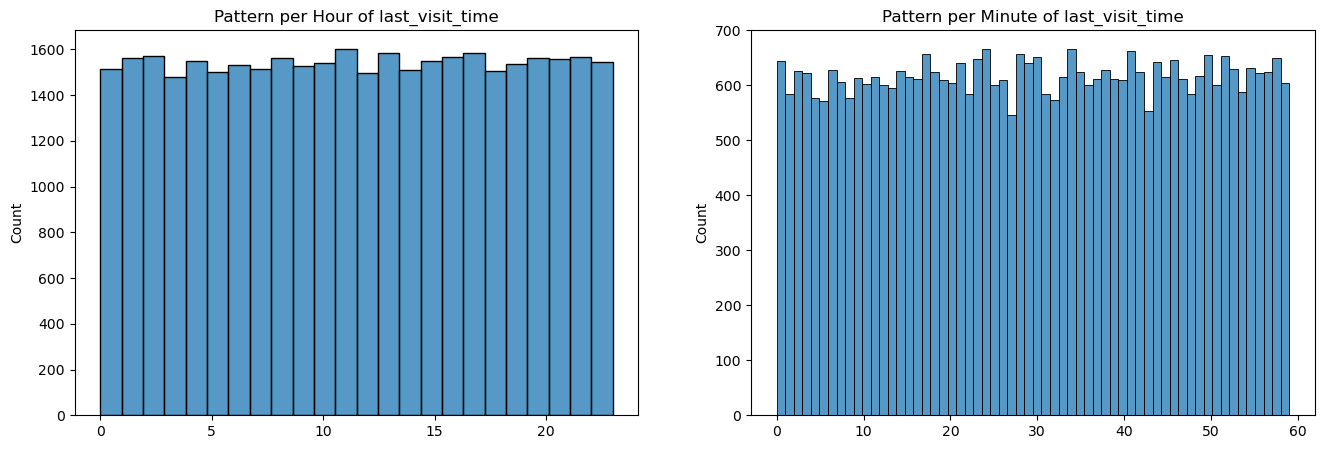

In [122]:
# Hourly pattern of last visit time
fig, ax = plt.subplots(ncols=2,figsize=(16,5))
sns.histplot(df.apply(lambda x: pd.to_datetime(x['last_visit_time']).hour, axis=1), bins=24, ax=ax[0])
ax[0].set_title('Pattern per Hour of last_visit_time')

# minute pattern of last visit time
sns.histplot(df.apply(lambda x: pd.to_datetime(x['last_visit_time']).minute, axis=1), bins=60, ax=ax[1])
ax[1].set_title('Pattern per Minute of last_visit_time')

Tidak ada pola pada kolom `last_visit_time` sehingga kolom ini tidak akan dilakukan handling high cardinality, melainkan `tidak akan diikut sertakan ke dalam feature dalam pemodelan`.

<Axes: title={'center': 'Churn Risk Score Distribution'}, ylabel='churn_risk_score'>

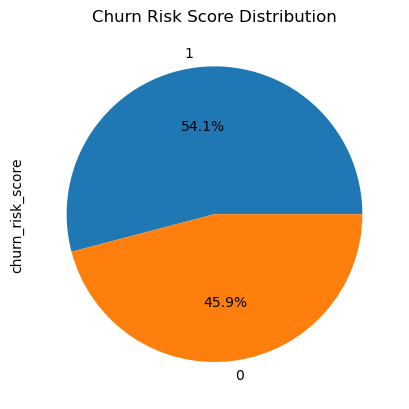

In [16]:
#Check the distribution of customers, categorized by churn risk score
df['churn_risk_score'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Churn Risk Score Distribution')

- Target 1 = customer yang melakukan churn, target 0 = customer yang tidak melakukan churn
- Lebih banyak customer yang melakukan churn daripada yang tidak namun distribusi masih cenderung balance

<Axes: xlabel='churn_risk_score'>

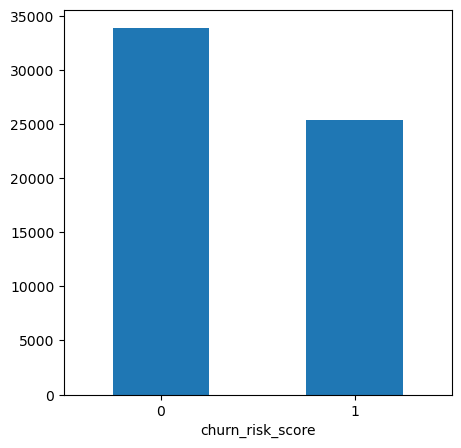

In [123]:
# Check the difference between average transaction value by customer who do the churn
plt.figure(figsize=[5,5])
df.groupby('churn_risk_score')['avg_transaction_value'].mean().plot(kind='bar', rot=0)

Customer yang tidak melakukan churn, cenderung memiliki rata-rata value transaksi yang lebih tinggi daripada yang melakukan churn. Kemungkinan customer yang lebih loyal kepada perusahaan, memang lebih membutuhkan produk kami sehingga value transaksi rata-rata lebih tinggi.

<Axes: xlabel='used_special_discount'>

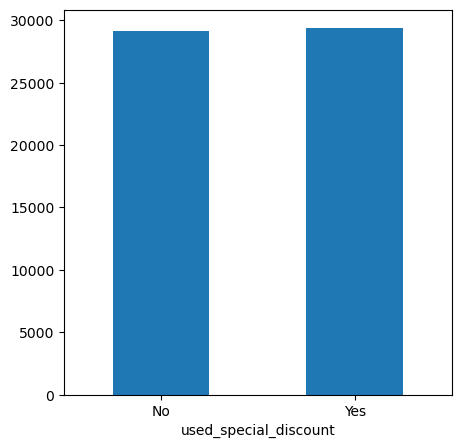

In [18]:
# Check the difference between average transaction value by customer who use the special discount
plt.figure(figsize=[5,5])
df.groupby('used_special_discount')['avg_transaction_value'].mean().plot(kind='bar', rot=0)

- Tidak ada perbedaan yang signifikan dari rata-rata value transaksi yang dilakukan oleh customer yang menggunakan special discount atau tidak
- Ini menggambarkan bahwa special discount tidak terlalu berpengaruh apabila ingin meningkatkan value transaksi yang dilakukan oleh customer

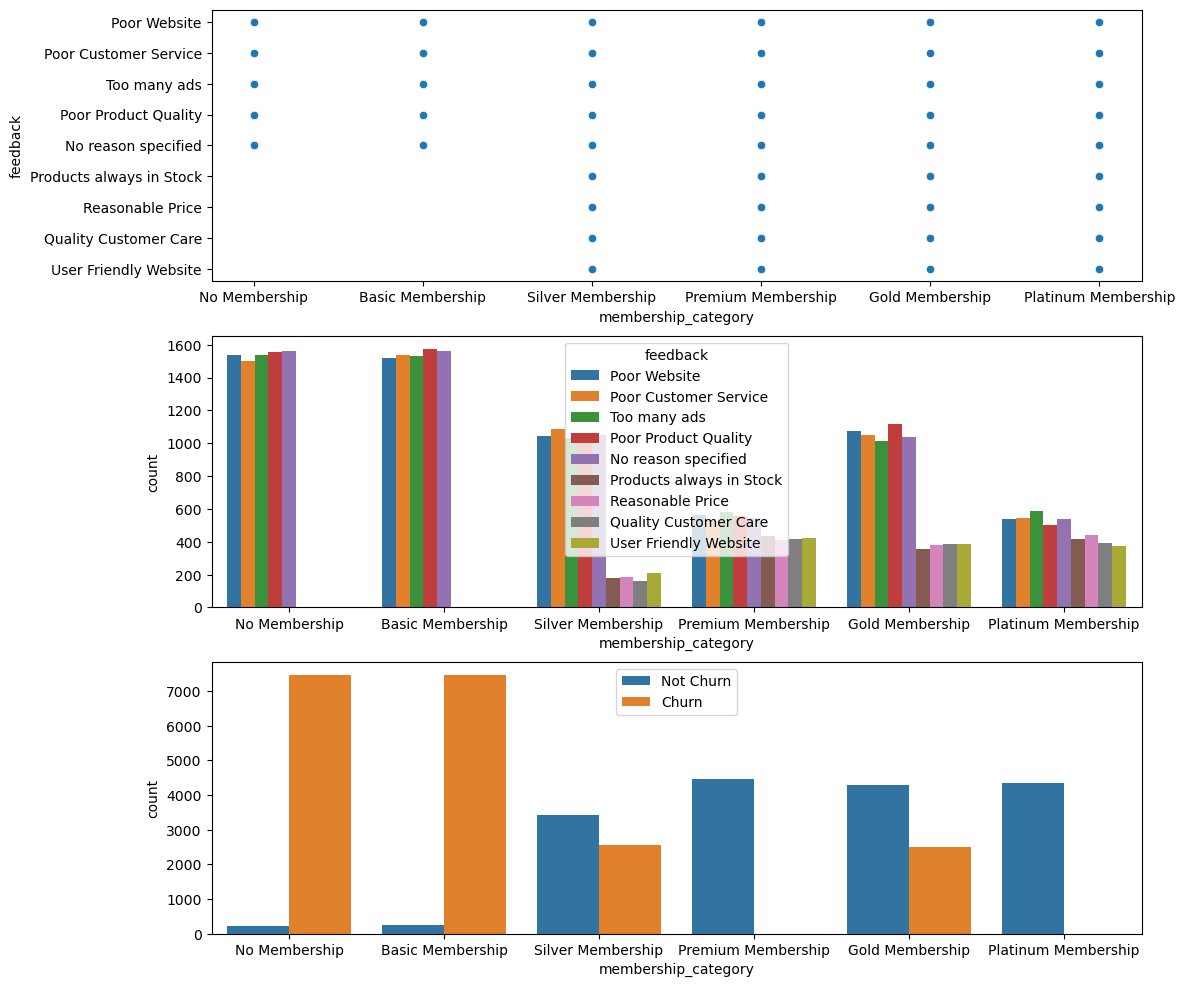

In [126]:
# Characteristik of membership based on the feedback and churn risk
plt.figure(figsize=[12,12])
plt.subplot(311)
sns.scatterplot(data=df, x='membership_category', y="feedback")

plt.subplot(312)
sns.countplot(x = 'membership_category', hue = 'feedback', data = df)

plt.subplot(313)
ax=sns.countplot(x = 'membership_category', hue = 'churn_risk_score', data = df)
ax.legend(labels = ['Not Churn', 'Churn'])

- No membership dan basic membership tidak pernah memberikan feedback, "products always in stock","reasonable price", "quality customer care", "user friendly website". Feedback ini termasuk sentimen positif yang mana akan mempengaruhi kenyamanan customer. Customer yang tidak menemukan kenyamanan ini cenderung tidak bertahan pada produk kami sehingga customer kategori ini lebih banyak melakukan churn daripada yang tidak
- Member yang bertahan paling banyak untuk tidak churn adalah premium dan platinum (member paling loyal), dengan jumlah feedback yang paling sedikit dibanding kelas member lainnya serta tidak melakukan churn sama sekali
- Member silver dan gold berada di tengah-tengah antara basic dan no dengan premium dan platinum, kedua kelas member ini memiliki resiko churn yang lebih rendah daripada yang tidak churn, sehingga customer kelas ini sudah cukup nyaman dengan produk kami, namun feedback sentimen negatif dari kedua kelas ini masih lebih tinggi daripada feedback sentimen positif
- Dilihat berdasarkan jumlah distribusi feedback negatif yang lebih banyak daripada feeback positif, diduga masih lebih banyak hal yang harus ditingkatkan baik dari segi kualitas produk maupun pendukung penjualan

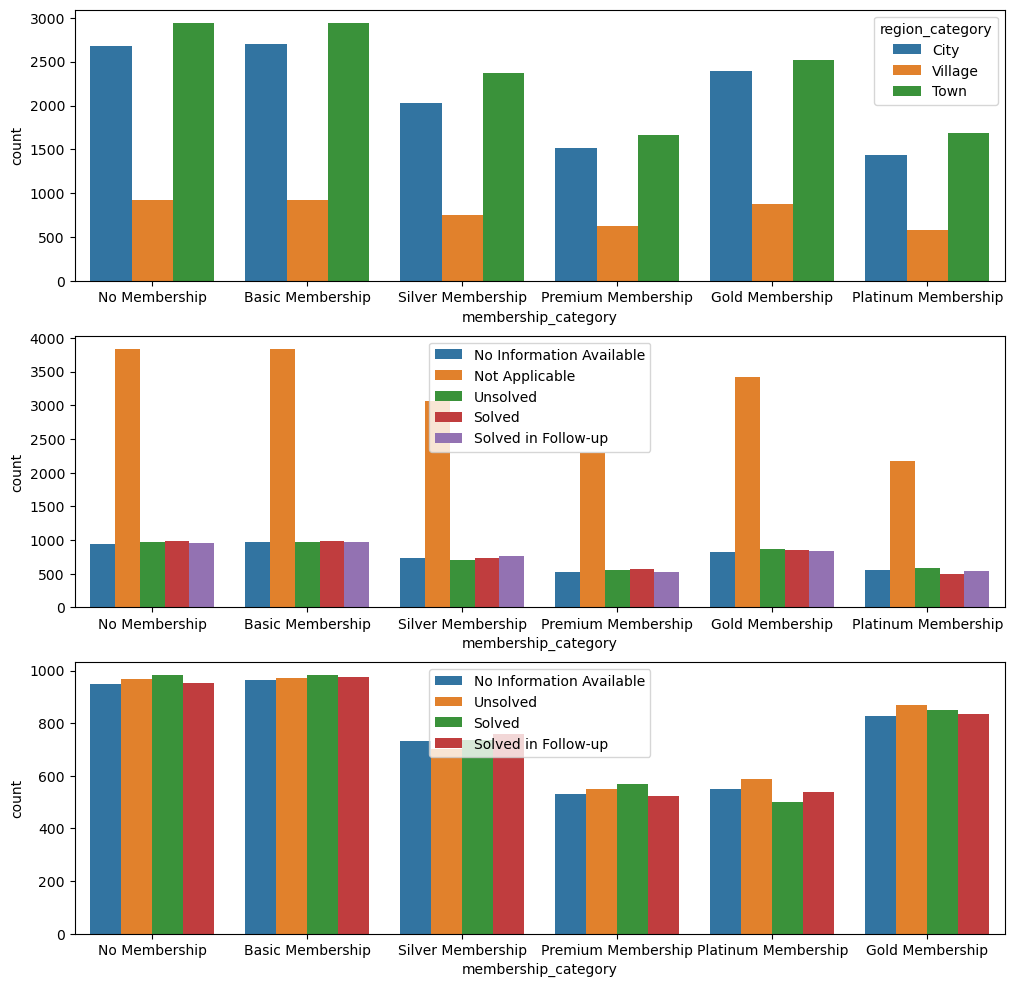

In [23]:
# Characteristik of membership based on the region category and complaint status
plt.figure(figsize=[12,12])
plt.subplot(311)
sns.countplot(x = 'membership_category', hue = 'region_category', data = df)

plt.subplot(312)
sns.countplot(x = 'membership_category', hue = 'complaint_status',data = df)
plt.legend(loc='upper center')

plt.subplot(313)
sns.countplot(x = 'membership_category', hue = 'complaint_status', 
              data = df.loc[df['complaint_status']!='Not Applicable'])
plt.legend(loc='upper center')

- Semua customer paling banyak tinggal di town dan city, ini kemungkinan karena akses pengiriman ke village lebih sukar sehingga sangat sedikit customer yang berasal dari village (desa)
- Ada sedikit perbedaan antara distribusi customer yang tinggal di town dan city, customer yang tinggal di town lebih banyak dibandingkan dengan yang tinggal di city, ini disebabkan karena customer ini membutuhkan produk kami khususnya akses online yang lebih mudah, namun daerah tempat mereka tinggal masih mudah untuk dijangkau dari segi pengiriman
- Berdasarkan complaint status, paling banyak complain yang tidak dapat diselesaikan karena tidak apllicable
- Distribusi complaint yang solved dan tidak solved kurang lebih mirip, dengan complaint terbanyak berasal dari membership kategori No dan Basic

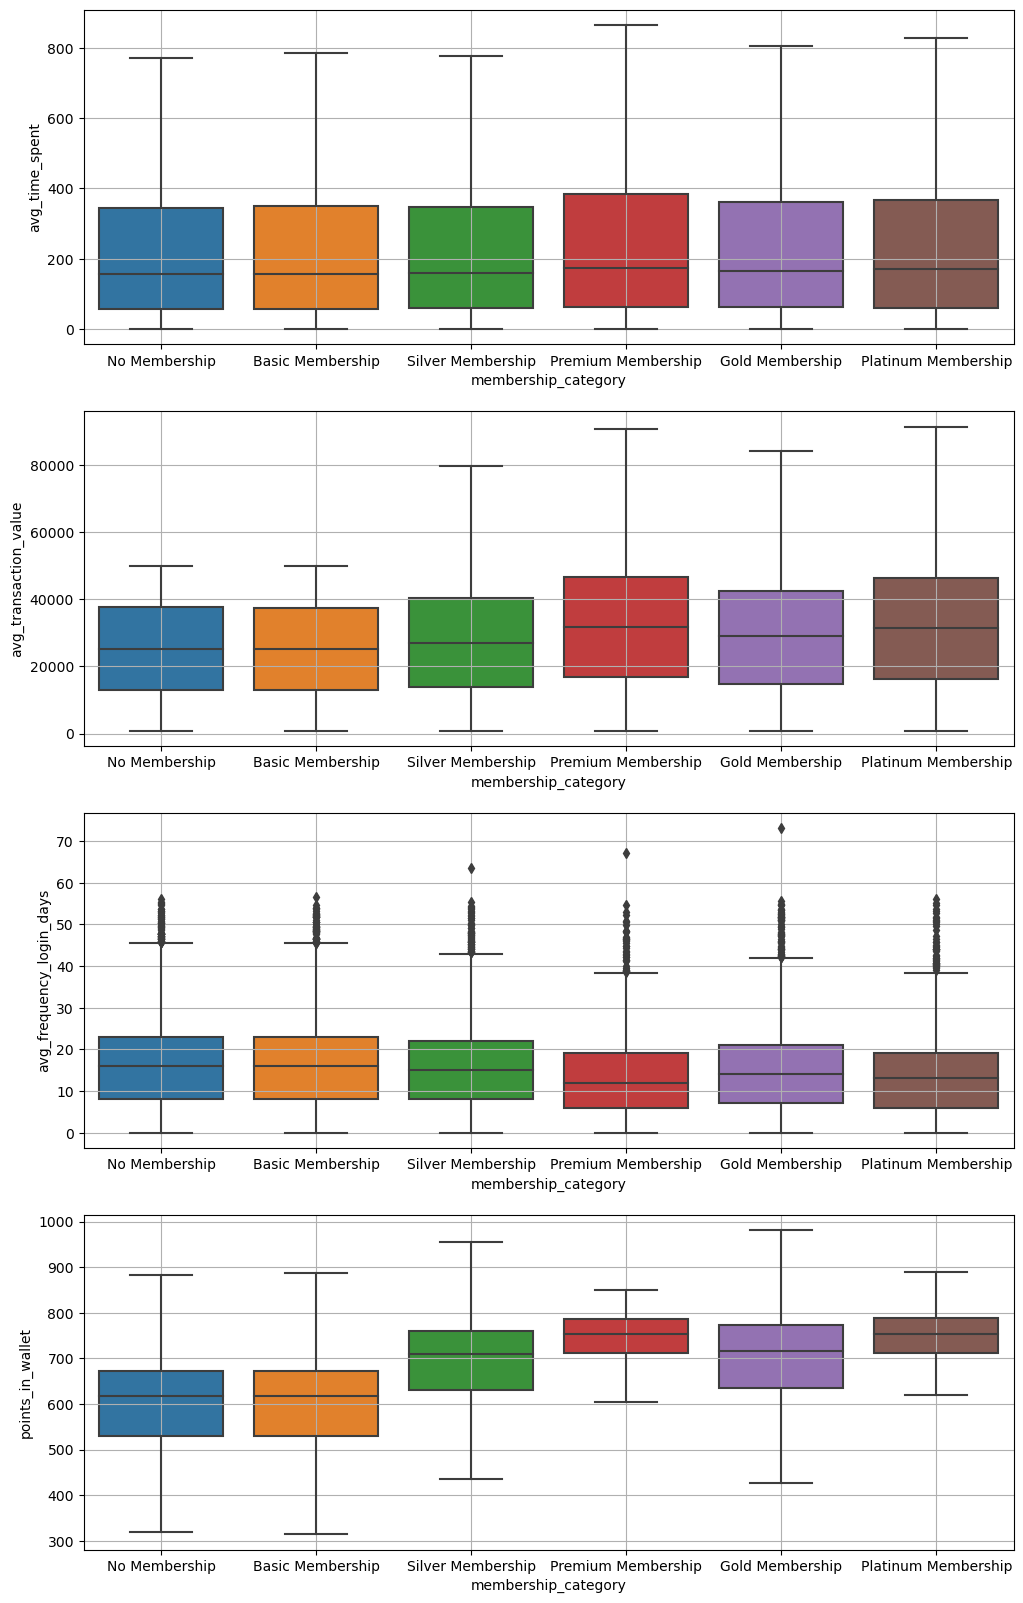

In [21]:
# Characteristik of membership based on the average time spent, transaction value, login days, and points
plt.figure(figsize=[12,20])
plt.subplot(411)
sns.boxplot(x = 'membership_category', y = 'avg_time_spent', data = df, showfliers = False)
plt.grid(True)

plt.subplot(412)
sns.boxplot(x = 'membership_category', y = 'avg_transaction_value', data = df, showfliers = False)
plt.grid(True)

plt.subplot(413)
sns.boxplot(x = 'membership_category', y = 'avg_frequency_login_days', data = df, showfliers = True)
plt.grid(True)

plt.subplot(414)
sns.boxplot(x = 'membership_category', y = 'points_in_wallet', data = df, showfliers = False)
plt.grid(True)

- Member premium dan platinum memiliki kecenderungan time spent, average transaction value, dan points in wallet lebih tinggi daripada member kelas lain. Membership yang sudah termasuk kategori loyal ini memiliki kecenderungan untuk tidak terlalu sering login dikarenakan sudah tau ingin membeli produk apa karena sudah berlangganan sehingga points cashback yang mereka dapat juga paling banyak dibandingkan member kelas lain
- Member kelas silver dan gold mengikuti premium dan platinum namun sedikit lebih di atas dari member kelas basic dan bukan member (transaksi medium)

<Axes: xlabel='membership_category', ylabel='count'>

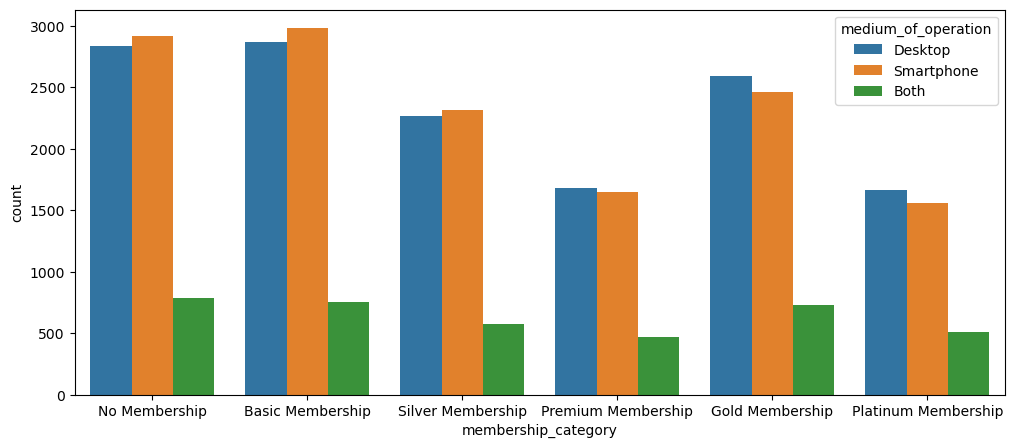

In [22]:
# Categorize membership based on medium of operation
plt.figure(figsize=[12,5])
sns.countplot(x = 'membership_category', hue = 'medium_of_operation', data = df)

- Persebaran customer yang menggunakan device baik dekstop maupun smartphone cenderung tidak ada perbedaan
- Member platinum dan premium lebih jarang visit ke situs toko karena sudah punya jadwal sendiri untuk kapan membeli produk toko
- Member kelas selain platinum dan premium masih browsing sehingga jumlah visit ke situs toko lebih tinggi

<Axes: xlabel='joined_through_referral'>

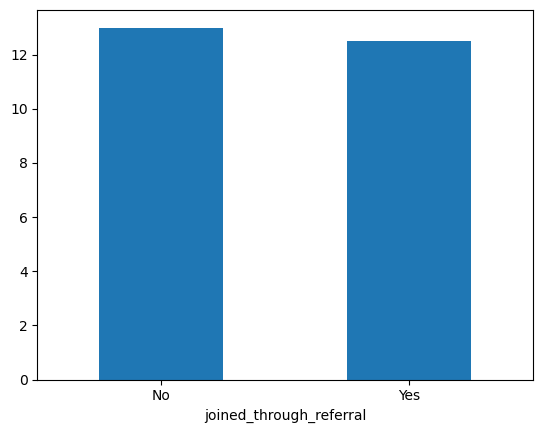

In [20]:
# Categorize customer based on joined_through_referral
df.groupby('joined_through_referral')['days_since_last_login'].mean().plot(kind='bar', rot=0)

Customer yang tidak joined through referral tidak terlalu aktif login ke situs kami dibuktikan dengan jumlah hari terakhir login yang lebih lama dari yang joined through referral.

## Split Between X and y Column

In [25]:
# Splitting between `X` and `y`

X = df.drop(['churn_risk_score'], axis=1)
y = df['churn_risk_score']

In [26]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.15, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=28)

X_train.shape, X_val.shape, X_test.shape

((26739, 21), (4719, 21), (5552, 21))

## Handling Missing Values

In [28]:
# The percentage of missing value in each column
print ("Percentage of missing value :")
X_train.isnull().mean()*100

Percentage of missing value :


user_id                          0.000000
age                              0.000000
gender                           0.172033
region_category                 14.682673
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.742511
preferred_offer_types            0.837728
medium_of_operation             14.731291
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            5.288156
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
dtype: float64

Selanjutnya akan dilakukan query terhadap semua kolom yang memiliki missing value.

In [200]:
# Query gender with missing value
df.loc[df['gender'].isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
22,be55c26b06eeb561,54,NaN,City,Basic Membership,2017-03-18,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,156.07000,32463.61,16.000000,639.820000,Yes,No,Yes,No Information Available,Poor Product Quality,1
145,a159641a5f8deac9,47,NaN,Town,Silver Membership,2015-04-20,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,262.65000,35934.73,19.000000,784.300000,Yes,Yes,Yes,Solved,Poor Website,0
728,b85b3149c460cd02,40,NaN,City,Silver Membership,2017-01-01,No,Without Offers,Desktop,Mobile_Data,...,333.25000,21440.09,18.000000,749.310000,Yes,No,No,Not Applicable,Products always in Stock,0
2304,94070fc001e5d60b,23,NaN,Village,Premium Membership,2017-10-28,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,...,93.88000,38875.53,22.000000,1181.889841,Yes,No,Yes,Unsolved,Poor Website,0
2586,8f54a6a4f89f7305,41,NaN,City,No Membership,2016-11-05,Yes,Without Offers,NaN,Fiber_Optic,...,52.11000,28298.29,6.000000,548.630000,No,Yes,Yes,Unsolved,Poor Product Quality,1
3926,8ace27a9d93861b0,13,NaN,Town,No Membership,2016-09-18,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,549.90000,15737.81,9.000000,573.000000,No,Yes,Yes,Unsolved,Too many ads,1
4023,9518edceea074d43,26,NaN,City,Basic Membership,2017-05-07,NaN,Without Offers,Smartphone,Wi-Fi,...,259.82000,21380.00,0.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1
4328,8c8af015fb0c05cd,52,NaN,Town,Gold Membership,2017-08-03,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,128.28000,15277.33,28.000000,787.840000,Yes,No,Yes,Solved,Poor Customer Service,0
5912,8d67e181f8dac02a,53,NaN,Village,Basic Membership,2015-09-13,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,650.07000,26235.35,0.000000,532.600000,No,Yes,Yes,No Information Available,No reason specified,1
5979,b0eff1eecbf9eb56,18,NaN,NaN,Platinum Membership,2015-12-15,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,221.57000,12808.70,7.000000,0.000000,Yes,No,Yes,Solved in Follow-up,No reason specified,0


In [201]:
# Query preferred_offer_types with missing value
df.loc[df['preferred_offer_types'].isnull()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
90,83f7dd56ba3a0464,52,F,NaN,Basic Membership,2017-04-20,Yes,NaN,Smartphone,Wi-Fi,...,68.820000,28467.12,0.00000,0.000000,Yes,No,No,Not Applicable,Poor Customer Service,1
164,8770519c75c4b2d3,58,M,City,Silver Membership,2017-07-07,No,NaN,NaN,Mobile_Data,...,173.870000,1045.85,24.00000,638.630000,No,Yes,No,Not Applicable,Too many ads,1
171,b42a19688ed2c20b,47,F,Town,No Membership,2017-07-20,No,NaN,Smartphone,Fiber_Optic,...,1033.552633,45197.88,7.00000,626.870000,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
246,88c4c93b81513e57,63,M,City,Gold Membership,2017-08-19,Yes,NaN,Smartphone,Fiber_Optic,...,438.260000,21627.21,13.00000,784.750000,Yes,No,Yes,No Information Available,Poor Website,0
254,a0ce1bae55f27bae,10,M,Town,Gold Membership,2016-07-22,Yes,NaN,Desktop,Fiber_Optic,...,869.982709,29733.41,6.00000,1216.180871,Yes,No,No,Not Applicable,Poor Website,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36232,887a1d3f3ad3ff15,63,M,NaN,Basic Membership,2016-08-25,NaN,NaN,Smartphone,Wi-Fi,...,30.260000,26346.31,24.00000,1145.229831,No,Yes,No,Not Applicable,Poor Customer Service,1
36268,83f27ce3e567032f,56,M,Town,Gold Membership,2017-08-28,Yes,NaN,Smartphone,Mobile_Data,...,99.540000,47845.03,38.34557,703.770000,Yes,No,Yes,Unsolved,No reason specified,0
36545,9825def06831b1c1,16,F,Village,Basic Membership,2017-07-27,Yes,NaN,Smartphone,Mobile_Data,...,94.860000,32054.85,15.00000,698.610000,No,Yes,No,Not Applicable,Poor Customer Service,1
36565,851bb0bed651ee79,57,M,NaN,Basic Membership,2017-11-27,No,NaN,NaN,Wi-Fi,...,42.320000,5430.74,28.00000,827.597493,Yes,No,No,Not Applicable,Poor Customer Service,1


Data gender dan preferred_offer_types tidak lengkap, kemungkinan karena customer ini mendapat pengalaman yang tidak enak dilihat berdasarkan complaint dan complaint status yang bersifat negatif dan tidak  selesai, sehingga mereka cenderung ingin bersikap netral dengan cara tidak mengisi kategori gender. Mereka juga tidak ingin mengisi data preferred offer types diduga karena tidak ingin menerima penawaran lagi dari toko kami.

<Axes: xlabel='churn_risk_score', ylabel='count'>

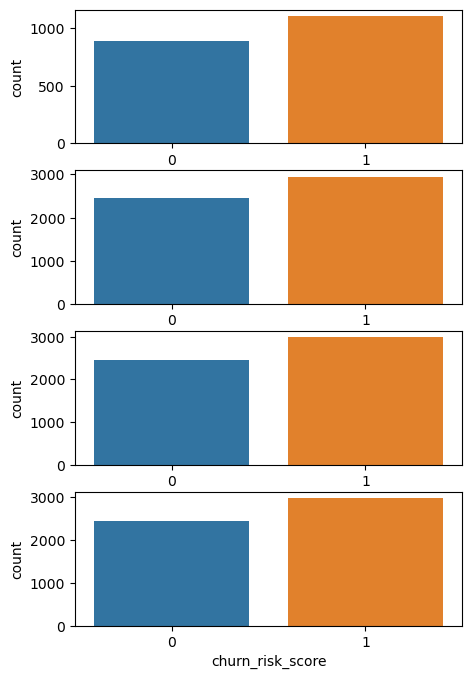

In [315]:
plt.figure(figsize=[5,8])
# Plot days since last login with missing value
plt.subplot(411)
sns.countplot(x='churn_risk_score',
              data=df.loc[df['days_since_last_login'].isnull()][['days_since_last_login','churn_risk_score']])

# Plot medium_of_operation login with missing value
plt.subplot(412)
sns.countplot(x='churn_risk_score', data=df.loc[df['medium_of_operation'].isnull()])

# Plot medium_of_operation login with missing value
plt.subplot(413)
sns.countplot(x='churn_risk_score', data=df.loc[df['joined_through_referral'].isnull()])

# Plot region_category login with missing value
plt.subplot(414)
sns.countplot(x='churn_risk_score', data=df.loc[df['region_category'].isnull()])

Lebih banyak customer yang melakukan churn dari data customer yang data terakhir login, medium of operation, joined through referral, dan region hilang. Diduga data ini missing not at random, yakni karena memang customer ini sudah tidak datang lagi ke situs kami sehingga perhitungan terakhir loginnya menjadi missing, serta data pendukung lain juga ikut hilang.

__Kesimpulan__ : Missing value termasuk ke dalam missing at random dan missing not at random sehingga akan di-impute menggunakan median dan mode

In [29]:
# Define the data type column
num_cols=X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols=X_train.select_dtypes(include=['object']).columns.tolist()

# Split the X based on the column type

X_train_num = X_train[num_cols]
X_train_cat= X_train[cat_cols]

X_val_num = X_val[num_cols]
X_val_cat = X_val[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

In [30]:
# Define the imputer
imputer_num=SimpleImputer(strategy="median")
imputer_cat=SimpleImputer(strategy="most_frequent")

# Impute the numerical missing value
X_train_num=pd.DataFrame(imputer_num.fit_transform(X_train_num), columns=num_cols)
X_val_num=pd.DataFrame(imputer_num.transform(X_val_num), columns=num_cols)
X_test_num=pd.DataFrame(imputer_num.transform(X_test_num), columns=num_cols)

# Impute the categorical missing value
X_train_cat=pd.DataFrame(imputer_cat.fit_transform(X_train_cat), columns=cat_cols)
X_val_cat=pd.DataFrame(imputer_cat.transform(X_val_cat), columns=cat_cols)
X_test_cat=pd.DataFrame(imputer_cat.transform(X_test_cat), columns=cat_cols)

print ("Percentage of missing value :")
print (X_train_num.isnull().mean()*100)
print (X_train_cat.isnull().mean()*100)

Percentage of missing value :
age                         0.0
days_since_last_login       0.0
avg_time_spent              0.0
avg_transaction_value       0.0
avg_frequency_login_days    0.0
points_in_wallet            0.0
dtype: float64
user_id                         0.0
gender                          0.0
region_category                 0.0
membership_category             0.0
joined_through_referral         0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
last_visit_time                 0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
dtype: float64


## Handling Outlier

age
% Upper Outlier for age : 0.00%
% Lower Outlier for age : 0.00%
Skewness of age : -0.01%


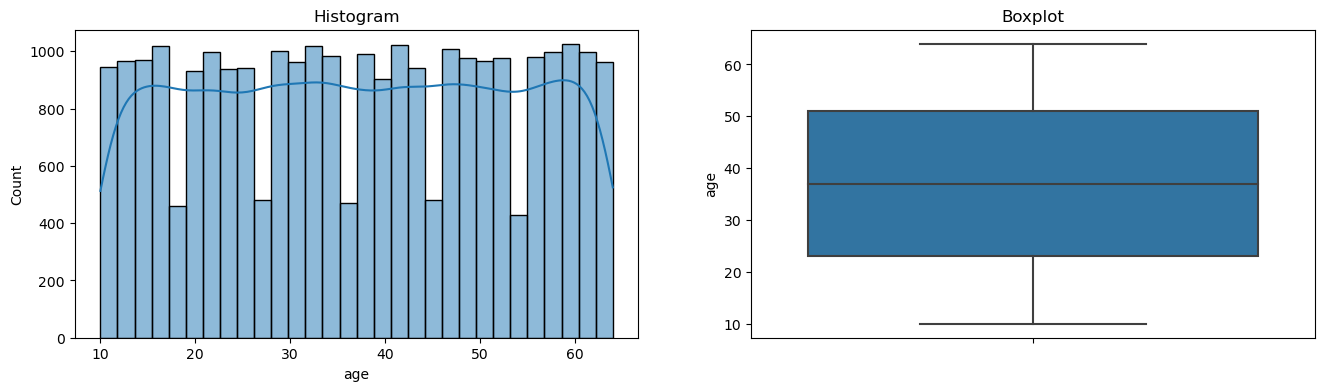

days_since_last_login
% Upper Outlier for days_since_last_login : 0.00%
% Lower Outlier for days_since_last_login : 0.00%
Skewness of days_since_last_login : 0.03%


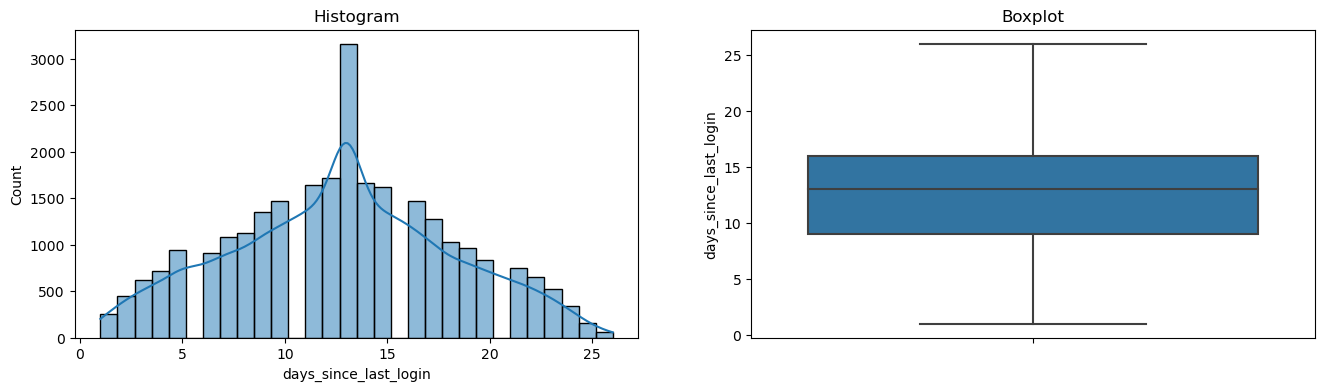

avg_time_spent
% Upper Outlier for avg_time_spent : 8.54%
% Lower Outlier for avg_time_spent : 0.00%
Skewness of avg_time_spent : 2.24%


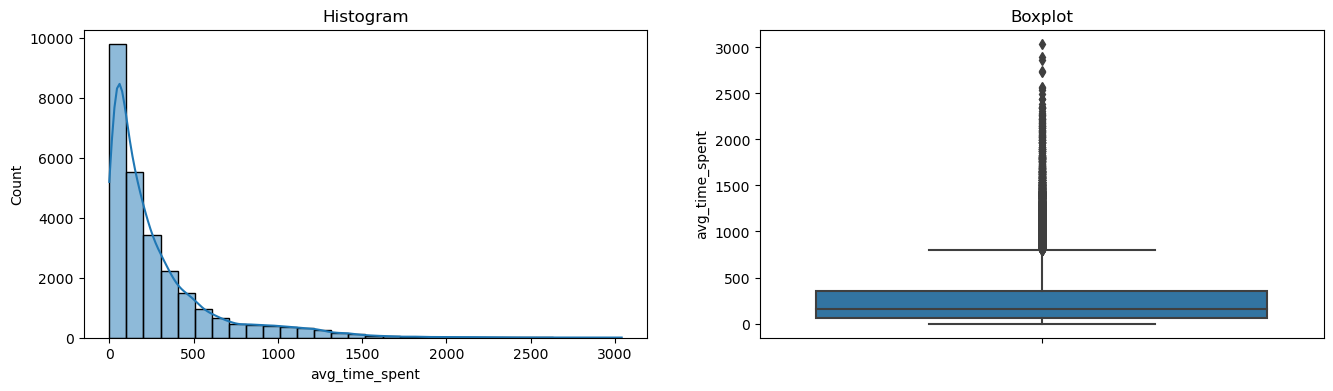

avg_transaction_value
% Upper Outlier for avg_transaction_value : 3.05%
% Lower Outlier for avg_transaction_value : 0.00%
Skewness of avg_transaction_value : 1.02%


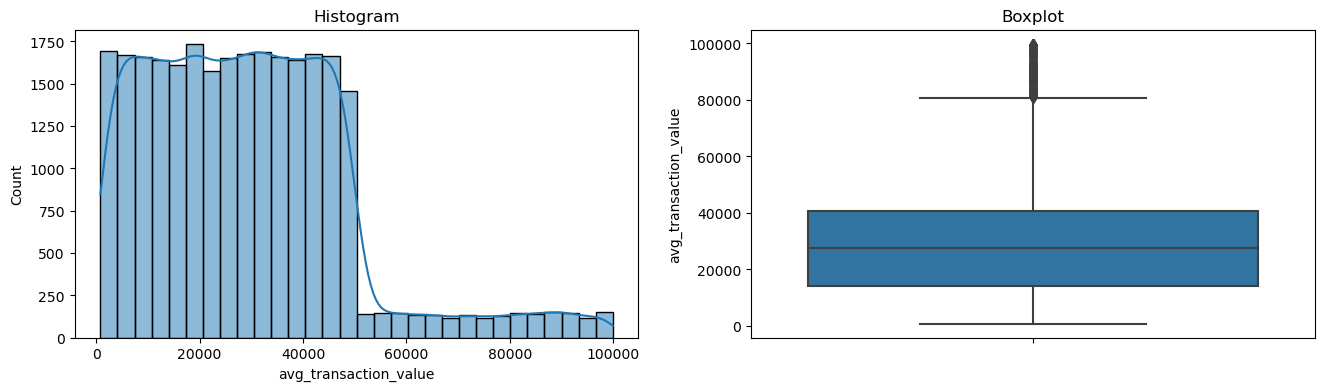

avg_frequency_login_days
% Upper Outlier for avg_frequency_login_days : 0.82%
% Lower Outlier for avg_frequency_login_days : 0.00%
Skewness of avg_frequency_login_days : 0.38%


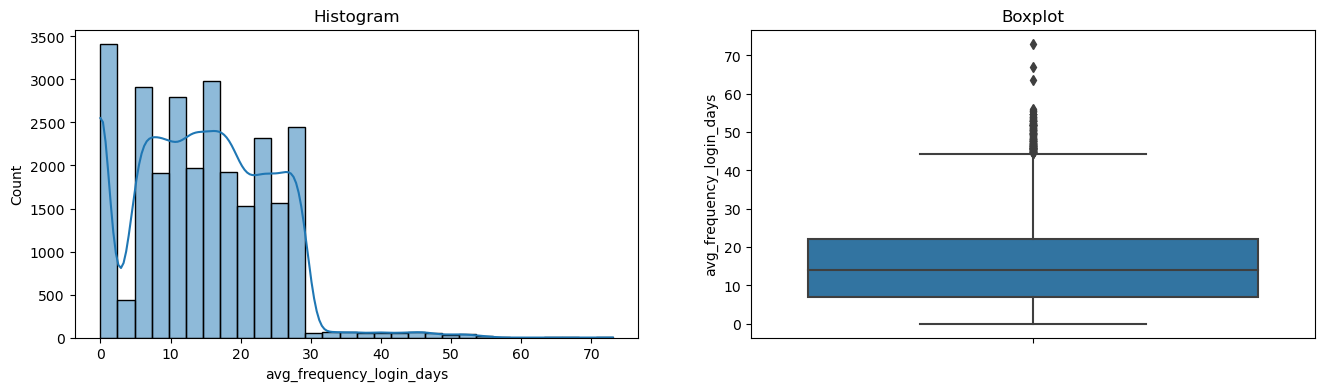

points_in_wallet
% Upper Outlier for points_in_wallet : 4.99%
% Lower Outlier for points_in_wallet : 13.38%
Skewness of points_in_wallet : -0.78%


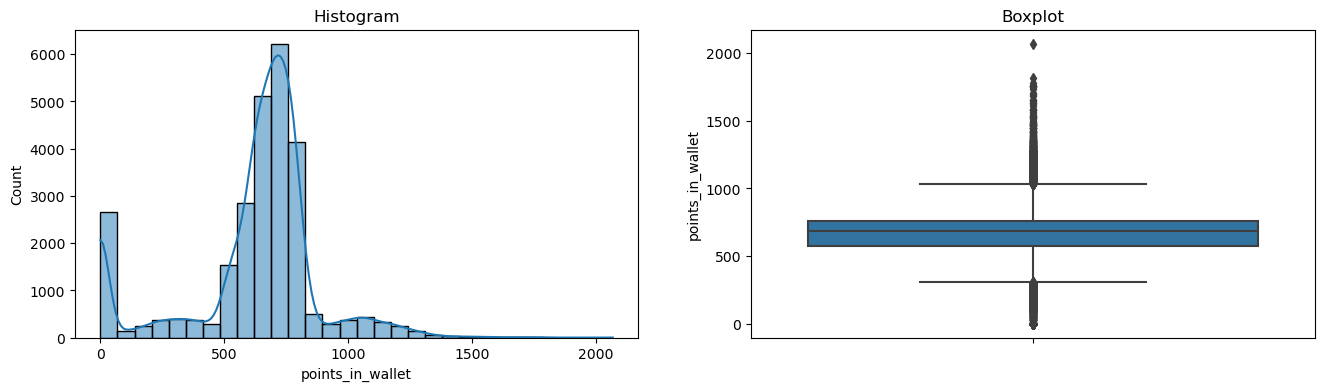

In [31]:
# Check the outlier in train data
for i in X_train_num.columns.values:
    globals()['Upper_'+i], globals()['Lower_'+i]=outlier_func.find_skewed_boundaries(X_train_num, i, 1.5,
                                                                                     X_train_num[i].skew())
    upper=globals()['Upper_'+i]
    lower=globals()['Lower_'+i]
    
    out_u=(len(X_train_num[X_train_num[i] > upper])/len(X_train_num) * 100)
    out_l=(len(X_train_num[X_train_num[i] < lower])/len(X_train_num) * 100)
    
    print(i)
    print('% Upper Outlier for '+i+' : {:.2f}%'.format(out_u))
    print('% Lower Outlier for '+i+' : {:.2f}%'.format(out_l))
    print('Skewness of '+i+' : {:.2f}%'.format(X_train_num[i].skew()))
    outlier_func.diagnostic_plots(X_train_num, i)
        

- Kolom avg_transaction_value dan avg_frequency_login_days memiliki outlier kurang dari 5% dan bukan merupakan natural outlier (akan di-trim)
- Kolom age dan days_since_last_login tidak memiliki outlier (tidak dihandle)
- Kolom avg_time_spent dan points_in_wallet memiliki outlier yang lebih dari 5% dan bukan merupakan natural outlier (akan di-censor)r

#### Trim the outlier less than 5%

In [32]:
# Flag the outliers
for i in ['avg_transaction_value', 'avg_frequency_login_days']:
    globals()['outliers_'+i] = np.where(X_train_num[i] > globals()['Upper_'+i], True,
                       np.where(X_train_num[i] < globals()['Lower_'+i], True, False))

# Let's trimm the dataset
X_train_num_trimmed = X_train_num.loc[~(outliers_avg_transaction_value+outliers_avg_frequency_login_days)]
print('Rows dataset - Before trimming : ', X_train_num.shape[0])
print('Rows dataset - After trimming  : ', X_train_num_trimmed.shape[0])

Rows dataset - Before trimming :  26739
Rows dataset - After trimming  :  25704


In [33]:
# Reset index and get the new index to be trimmed
y_train.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)

# Drop the index column in y_train and other x_train
y_train_final=pd.DataFrame(data=y_train, index=X_train_num_trimmed.index.values)
X_train_cat_trimmed = pd.DataFrame(data=X_train_cat, index=X_train_num_trimmed.index.values)
y_train_final.shape, X_train_cat_trimmed.shape

((25704, 1), (25704, 14))

#### Capping the outlier greater than 5%

In [34]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['avg_time_spent','points_in_wallet'])

windsoriser.fit(X_train_num_trimmed)

X_train_num_capped = windsoriser.transform(X_train_num_trimmed)
X_val_num_capped = windsoriser.transform(X_val_num)
X_test_num_capped = windsoriser.transform(X_test_num)

## Feature Selection

In [35]:
# Create a copy of X data
X_cat_copy=pd.DataFrame(OrdinalEncoder(handle_unknown="use_encoded_value", 
                                                      unknown_value=-1).fit_transform(X_train_cat_trimmed), 
                                       columns=cat_cols)
                        
X_copy=pd.concat([X_cat_copy,X_train_num_capped.reset_index(drop=True)], axis=1)

In [37]:
# Create a copy dataframe
df_copy=pd.concat([X_copy,y_train_final.reset_index(drop=True)],axis=1)
df_copy.isnull().mean()

user_id                         0.0
gender                          0.0
region_category                 0.0
membership_category             0.0
joined_through_referral         0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
last_visit_time                 0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
age                             0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
churn_risk_score                0.0
dtype: float64

### Using Pearson Correlation

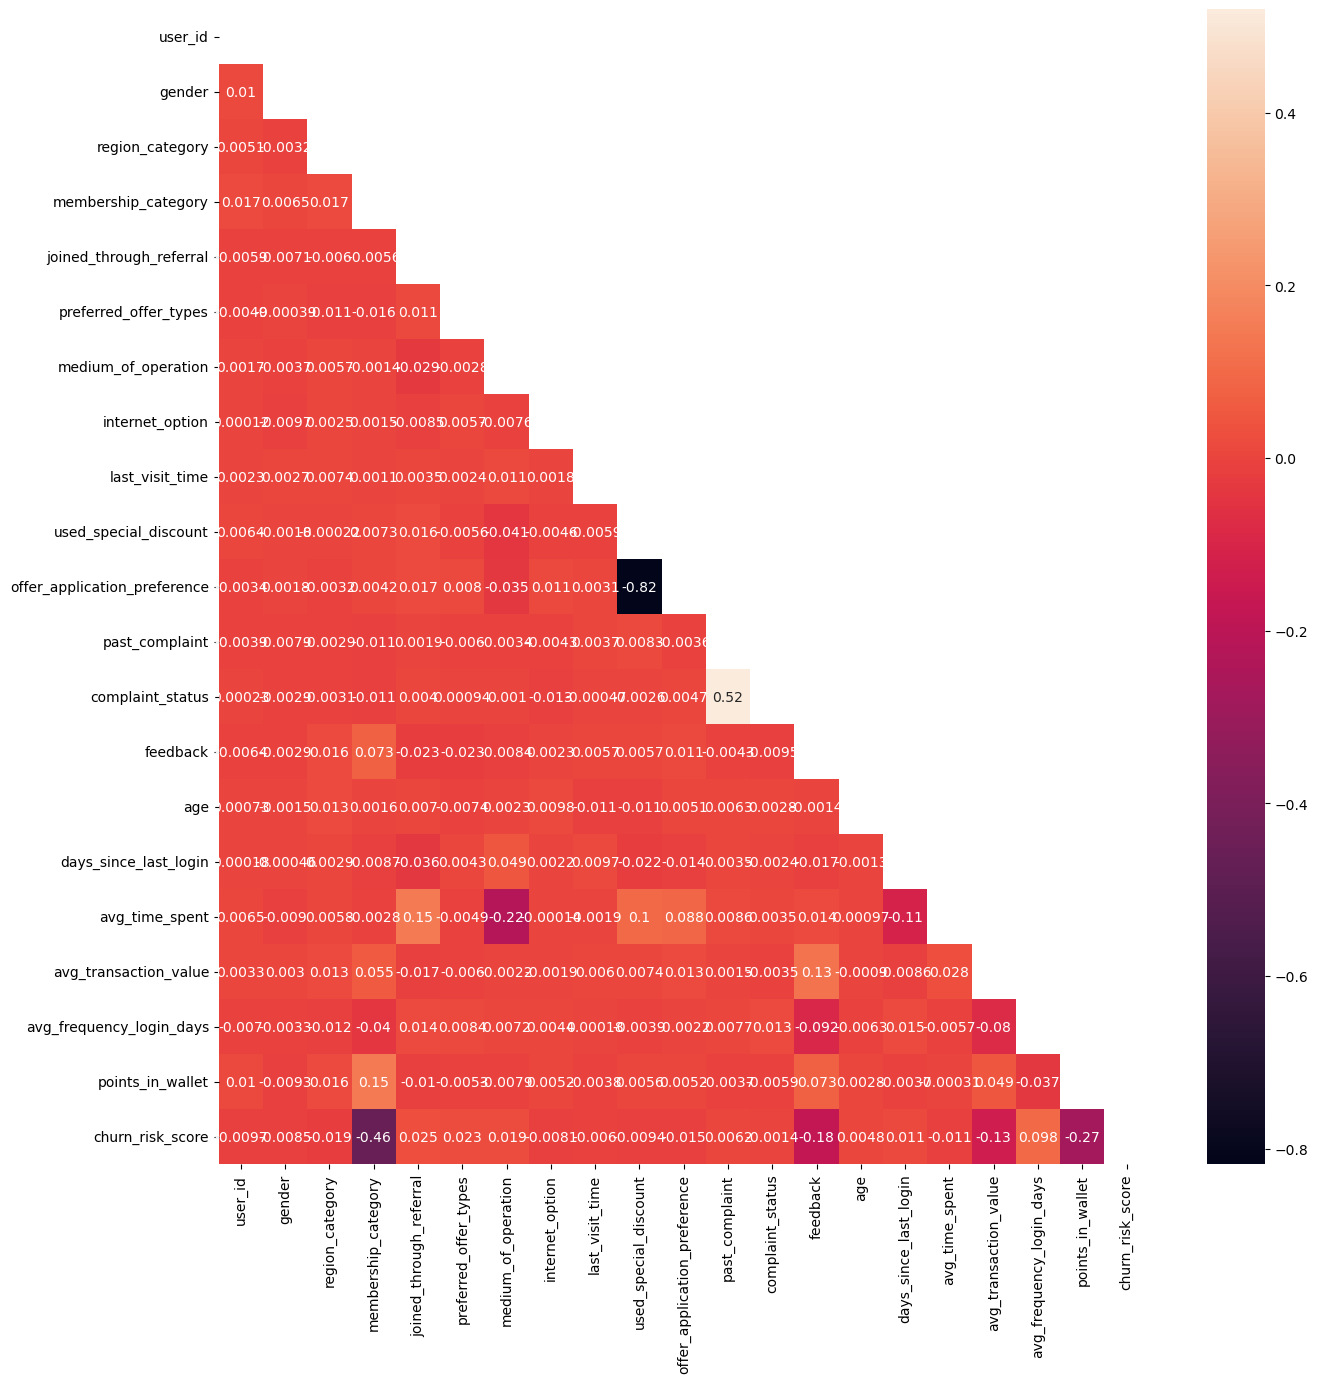

In [319]:
#Check the correlations
corr = df_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

Tidak ada hubungan yang erat antar fitur sehingga tidak akan menyebabkan dependensi dan complexity antar fitur.

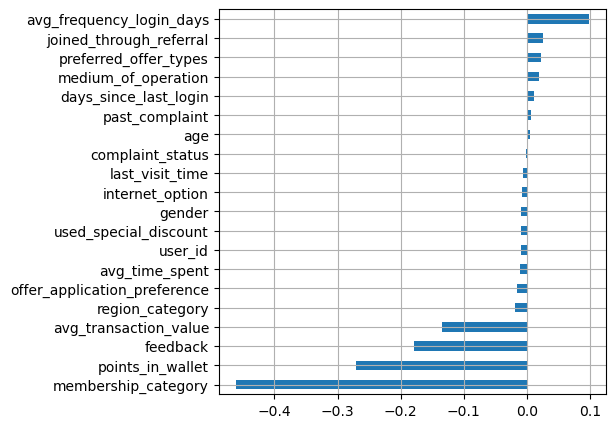

In [39]:
# Plot of correlation for each feature to the churn risk
plt.figure(figsize=(5,5))
corr['churn_risk_score'][:-1].sort_values().plot(kind='barh')
plt.grid(True)

- Feature yang memiliki nilai mendekati nol adalah past_complaint, age, complaint_status, last_visit_time, sehingga kolom-kolom ini akan di-drop dari data X
- Feature dari user id tidak berpengaruh kepada target karena tidak ada sangkut pautnya apakah user tersebut akan churn atau tidak, kolom ini dapat membuat model cenderung menghapal dibandingkan belajar

In [40]:
# Drop the column from feature selection
X_train_num_capped.drop(['age'], axis=1, inplace=True)
X_val_num_capped.drop(['age'], axis=1, inplace=True)
X_test_num_capped.drop(['age'], axis=1, inplace=True)

X_train_cat_trimmed.drop(['past_complaint', 'complaint_status', 'last_visit_time', 'user_id'], axis=1, inplace=True)
X_val_cat.drop(['past_complaint', 'complaint_status', 'last_visit_time', 'user_id'], axis=1, inplace=True)
X_test_cat.drop(['past_complaint', 'complaint_status', 'last_visit_time', 'user_id'], axis=1, inplace=True)

In [41]:
# Concat the X data to be transformed in pipeline (scaling and encoding)
X_train_concat=pd.concat([X_train_num_capped.reset_index(drop=True),X_train_cat_trimmed.reset_index(drop=True)], axis=1)
X_val_concat=pd.concat([X_val_num_capped.reset_index(drop=True),X_val_cat.reset_index(drop=True)], axis=1)
X_test_concat=pd.concat([X_test_num_capped.reset_index(drop=True),X_test_cat.reset_index(drop=True)], axis=1)

## Building The Pipeline

#### Feature Scaling

Mendefinisikan terlebih dahulu kolom yang terdistribusi normal dan yang tidak untuk melakukan scaling.
Menurut GoodData, distribusi yang memiliki skewness kurang dari -0.5 atau lebih dari 0.5 merupakan distribusi yang memiliki kemiringan, sehingga :
- Normal numerical columns = 'days_since_last_login', 'avg_frequency_login_days' (di-scaling menggunakan StandardScaler)
- Skewed numerical columns = 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet' (di-scaling menggunakan MinMaxScaler)

In [42]:
# Define the numerical columns to be scaled with different scaler
num_cols_norm=[ 'days_since_last_login', 'avg_frequency_login_days']
num_cols_skew=['avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

#### Feature Encoding

- Data kategorikal nominal, yaitu 'region_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'feedback', akan di-encode menggunakan OneHotEncoder
- Data kategorikal ordinal, yaitu 'membership_category', dan active_month, akan di-encode menggunakan OrdinalEncoder
- Data binary, yakni 'joined_through_referral', 'used_special_discount', dan 'offer_application_preference', akan di-encode menggunakan OrdinalEncoder

In [43]:
# Define the categorical column based on nominal and ordinal columns
nom_cat_cols=['region_category', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'feedback']
ord_cat_cols=['membership_category', 'joined_through_referral', 'used_special_discount','offer_application_preference']

#### Creating the Pipeline

In [44]:
# Create the Pipeline
std_pipeline = Pipeline(
        steps=[
            ('std_scaler',StandardScaler())
        ])

mm_pipeline = Pipeline(
    steps=[
        ('mm_scaler',MinMaxScaler())
    ]
)


ohe_pipeline = Pipeline(
    steps=[
        ("ohe_enc", OneHotEncoder(handle_unknown="ignore")),
    ]
)

ode_pipeline = Pipeline(
    steps=[
        ("ode_enc", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1,
                    categories=[['No Membership','Basic Membership', 'Silver Membership','Gold Membership',
                                 'Platinum Membership','Premium Membership'],
                                ['No', 'Yes'],['No','Yes'], ['No','Yes']])),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_norm", std_pipeline, num_cols_norm),
        ("num_skew", mm_pipeline, num_cols_skew),
        ("cat_nom", ohe_pipeline, nom_cat_cols),
        ("cat_ord", ode_pipeline, ord_cat_cols),
                  
    ]
)

In [45]:
# Transform the final X data

X_train_final=preprocessor.fit_transform(X_train_concat)
X_val_final=preprocessor.transform(X_val_concat)
X_test_final=preprocessor.transform(X_test_concat)

In [184]:
# Load the train, validation, and test set using tensorflow pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train_final)).batch(16).shuffle(100).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final,y_test)).batch(16)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).batch(16)

## Sequential API

### Model Definition

- Model yang digunakan adalah Model Sequential
- Neuron yang digunakan pada input berjumlah 30
- Digunakan 4 layer yaitu input, 2 hidden layer, dan 1 output layer
- Inisialisasi menggunakan HeNormal (mengambil sampel dari distribusi normal terpotong yang berpusat pada 0)
- Regularizer yang digunakan adalah l2 penalty (loss = l2 * reduce_sum(square(x)))
- Fungsi aktivasi yang digunakan adalah relu (fungsi linier yang akan mengeluarkan input secara langsung jika positif, jika tidak, ia akan mengeluarkan nol)
- Optimizer yang digunakan adalah adam (optimisasi yang dapat digunakan sebagai ganti dari prosedur classical stochastic gradient descent untuk memperbarui bobot secara iteratif yang didasarkan pada data training)
- Callback yang digunakan adalah early stop dengan tingkat kesabaran 3 kali dan memonitoring parameter loss

In [316]:
print ("Jumlah input layer :",X_train_final.shape[1])

Jumlah input layer : 30


In [212]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


# Model definition
model_seq = tf.keras.models.Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_seq.add(tf.keras.layers.Dense(13, activation='relu',input_shape=(30,),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seq.add(tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dense(183, activation='relu')) #hidden layer
model_seq.add(tf.keras.layers.BatchNormalization())
model_seq.add(tf.keras.layers.Dropout(0.1))
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),
                  metrics=tf.keras.metrics.Recall())

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                403       
                                                                 
 batch_normalization (BatchN  (None, 13)               52        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 183)               2562      
                                                                 
 batch_normalization_1 (Batc  (None, 183)              732       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 183)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

### Model Training

In [213]:
%%time

# Train the model
history_seq = model_seq.fit(train_pipe, epochs=100, validation_data=val_pipe,callbacks=[callback])

Epoch 1/100
1607/1607 [==============================] - 11s 6ms/step - loss: 0.4772 - recall: 0.8578 - val_loss: 0.3556 - val_recall: 0.8860
Epoch 2/100
1607/1607 [==============================] - 9s 5ms/step - loss: 0.3541 - recall: 0.8615 - val_loss: 0.3091 - val_recall: 0.7662
Epoch 3/100
1607/1607 [==============================] - 9s 5ms/step - loss: 0.3231 - recall: 0.8575 - val_loss: 0.2972 - val_recall: 0.8155
Epoch 4/100
1607/1607 [==============================] - 9s 6ms/step - loss: 0.3137 - recall: 0.8573 - val_loss: 0.3021 - val_recall: 0.8993
Epoch 5/100
1607/1607 [==============================] - 9s 5ms/step - loss: 0.3102 - recall: 0.8612 - val_loss: 0.2954 - val_recall: 0.7846
Epoch 6/100
1607/1607 [==============================] - 9s 5ms/step - loss: 0.3058 - recall: 0.8688 - val_loss: 0.2800 - val_recall: 0.8061
Epoch 7/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.2939 - recall: 0.8888 - val_loss: 0.3001 - val_recall: 0.9412
Epoch 8/100


### Model Evaluation

Pada evaluasi kali ini, digunakan rubrik recall agar dapat menilai performa model berdasarkan False Negative, yakni prediksi terhadap customer yang seharusnya churn namun diprediksikan tidak churn. Tujuan dari pemodelan ini adalah untuk mendeteksi customer yang akan melakukan churn, akibat dari prediksi yang tidak dapat mencari customer yang akan melakukan churn, akan berdampak pada kerugian perusahaan, sehingga metric recall adalah metric yang paling tepat untuk menganalisis hal ini dari hasil pemodelan.

In [214]:
# Create Dataframe

history_seq_df =  pd.DataFrame(history_seq.history)
history_seq_df

,loss,recall,val_loss,val_recall
0,0.477167,0.857771,0.355631,0.886016
1,0.354104,0.861470,0.309054,0.766157
2,0.323066,0.857492,0.297154,0.815511
3,0.313661,0.857282,0.302051,0.899334
4,0.310226,0.861191,0.295441,0.784567
5,0.305817,0.868798,0.279975,0.806110
6,0.293903,0.888827,0.300054,0.941246
7,0.280972,0.908019,0.252397,0.845280
8,0.274865,0.911648,0.252945,0.925186
9,0.271536,0.912695,0.241449,0.903643


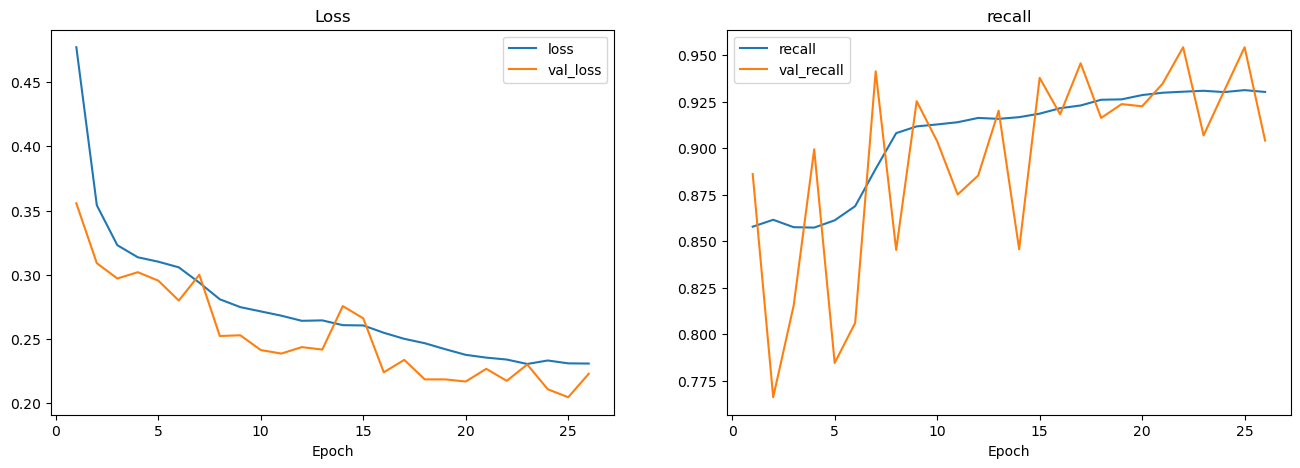

In [215]:
# Evaluate the loss and recall of the model
epoch=26

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history_seq.history['val_recall'],label='val_recall')
ax[1].set_title('recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

- Terdapat sedikit kecenderungan overfitting pada model, dilihat berdasarkan nilai val recall yang naik turun namun model ini sudah cukup baik karena sebaran dari val recall yang masih pada range yang dapat diterima
- Nilai loss menunjukkan bahwa error pada model berada pada range 0.2 hingga 0.25 (nilai yang cukup kecil, yang berarti ada sebaran error +/- 0.2 hingga 0.25 pada nilai prediksi model ini)
- Nilai loss val yang memiliki jarak dengan nilai nilai loss train juga menandakan adanya sedikit kecenderungan overfit, namun masih pada range yang dapat diterima

In [193]:
# Model Evaluation of test-set
y_pred_seq = model_seq.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
print (classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.84      0.89      2553
           1       0.88      0.95      0.91      2999

    accuracy                           0.90      5552
   macro avg       0.91      0.90      0.90      5552
weighted avg       0.90      0.90      0.90      5552



- Nilai recall sudah bagus, yakni di atas 90% yang berarti model sudah dapat mengurangi resiko kegagalan memprediksi customer yang akan melakukan churn namun diprediksikan tidak melakukan churn
- Meskipun presisi bukan point utama penilaian model ini, kita bisa mendapatkan informasi bahwa adanya kecenderungan model yang memprediksi customer melakukan churn padahal tidak, dikarenakan nilai presisi yang di bawah 90%, ada beberapa kasus yang diprediksikan akan menjadi false alarm, yakni ada beberapa kali menghasilkan nilai False Positive (beberapa customer yang tidak churn diprediksikan melakukan churn)

## Functional API

### Model Definition

- Model yang digunakan adalah Model Functional
- Neuron yang digunakan pada input berjumlah 30
- Digunakan 4 layer yaitu input, 2 hidden layer, dan 1 output layer
- Fungsi aktivasi yang digunakan adalah relu (fungsi linier yang akan mengeluarkan input secara langsung jika positif, jika tidak, ia akan mengeluarkan nol)
- Callback yang digunakan adalah early stop dengan tingkat kesabaran 3 kali dan memonitoring parameter loss

In [194]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [195]:
# Create Functional Model


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
input_layer = Input(shape=(30,))
hidden_layer_1 = Dense(16, activation='relu')(input_layer)
hidden_layer_2 = Dense(8, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=tf.keras.metrics.Recall())

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           496         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

### Model Training

In [196]:
%%time

# Train the model
history_func = model_functional.fit(train_pipe,
                                    epochs=100,
                                    validation_data=val_pipe,callbacks=[callback])

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.3502 - recall: 0.8289 - val_loss: 0.3004 - val_recall: 0.8825
Epoch 2/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.2945 - recall: 0.8760 - val_loss: 0.2942 - val_recall: 0.8805
Epoch 3/100
1607/1607 [==============================] - 8s 5ms/step - loss: 0.2931 - recall: 0.8765 - val_loss: 0.2943 - val_recall: 0.8656
Epoch 4/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.2916 - recall: 0.8776 - val_loss: 0.2919 - val_recall: 0.8809
Epoch 5/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.2914 - recall: 0.8779 - val_loss: 0.2932 - val_recall: 0.8653
Epoch 6/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.2909 - recall: 0.8780 - val_loss: 0.2907 - val_recall: 0.8797
Epoch 7/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.2884 - recall: 0.8763 - val_loss: 0.2867 - val_recall: 0.8719
Epoch 8/100
1

Epoch 59/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.2466 - recall: 0.8879 - val_loss: 0.2636 - val_recall: 0.8590
Epoch 60/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.2465 - recall: 0.8885 - val_loss: 0.2622 - val_recall: 0.8888
CPU times: total: 43min 39s
Wall time: 5min 27s


### Model Evaluation

Mengacu pada section model sectional, metric yang digunakan kali ini juga adalah metric recall.

In [197]:
# Create Dataframe

history_func_df =  pd.DataFrame(history_func.history)
history_func_df

,loss,recall,val_loss,val_recall
0,0.350226,0.828948,0.300388,0.882491
1,0.294482,0.875986,0.294177,0.880533
2,0.293147,0.876544,0.294295,0.865648
3,0.291644,0.877591,0.291935,0.880924
4,0.291424,0.877870,0.293174,0.865257
5,0.290905,0.878010,0.290651,0.879749
6,0.288447,0.876265,0.286749,0.871915
7,0.284790,0.877172,0.283614,0.873091
8,0.280953,0.876544,0.283941,0.863298
9,0.276274,0.879685,0.279185,0.862123


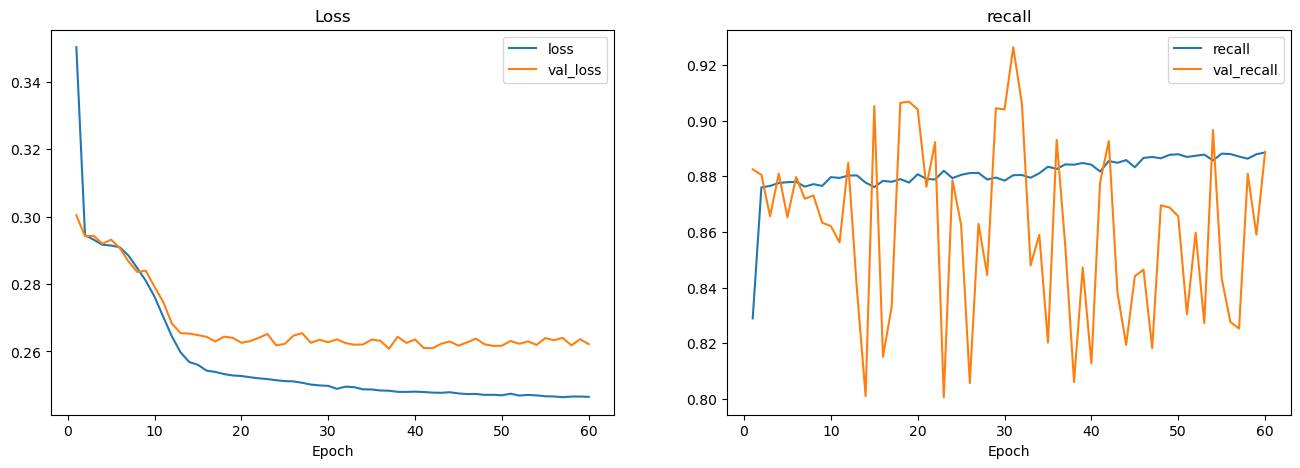

In [203]:
# Evaluate the loss and recall of the model
epoch=60

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history_func.history['val_recall'],label='val_recall')
ax[1].set_title('recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

- Terdapat kecenderungan overfitting pada model, dilihat berdasarkan nilai val recall yang naik turun
- Nilai loss menunjukkan bahwa error pada model berada di atas 0.26 (yang berarti ada sebaran error +/- 0.26 pada nilai prediksi model ini)
- Nilai loss val yang memiliki jarak dengan nilai nilai loss train juga menandakan adanya kecenderungan overfit
- Model ini belum dapat dipakai, masih perlu dilakukan improvement

In [204]:
# Model Evaluation of test-set
y_pred_func = model_functional.predict(X_test_final)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
print (classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2553
           1       0.90      0.89      0.89      2999

    accuracy                           0.89      5552
   macro avg       0.89      0.89      0.89      5552
weighted avg       0.89      0.89      0.89      5552



- Nilai recall sudah cukup bagus, yakni 89% yang berarti model sudah dapat mengurangi resiko kegagalan memprediksi customer yang akan melakukan churn namun diprediksikan tidak melakukan churn, akan tetapi, masih sedikit kurang diterima, diharapkan dapat mencapai di atas 90%
- Kebalikan dengan sectional model, functional model kali ini sudah memiliki performa model dari segi presisi yang baik. Model ini bisa mengurangi resiko salah sasaran dari customer yang akan melakukan churn (False Positive), namun karena terlalu banyak customer yang diprediksikan Negative (tidak churn), menyebabkan ke nilai recall yang belum maksimal

## Model Improvement

Pada improvement kali ini, digunakan 2 model dari section sebelumnya, yaitu model sequential dan model functional, dengan memakai metric penilaian yang sama, yakni recall. Kami mencoba mengubah jumlah neuron pada hidden layer dan menggunakan optimizer yang dapat bekerja lebih baik daripada optimizer Adam pada beberapa kasus.

### Sequential API

- Model yang digunakan adalah Model Sequential
- Neuron yang digunakan pada input berjumlah 30
- Digunakan 4 layer yaitu input, 2 hidden layer, dan 1 output layer (dengan penambahan jumlah neuron pada hidden layer)
- Inisialisasi menggunakan HeNormal (mengambil sampel dari distribusi normal terpotong yang berpusat pada 0)
- Regularizer yang digunakan adalah l2 penalty (loss = l2 * reduce_sum(square(x)))
- Fungsi aktivasi yang digunakan adalah relu (fungsi linier yang akan mengeluarkan input secara langsung jika positif, jika tidak, ia akan mengeluarkan nol)
- Optimizer yang digunakan adalah RMSprop (metode optimasi adaptif yang sering kali sangat bagus, converging dengan cepat ke solusi yang baik, kadang digunakan jika optimizer Adam tidak menghasilkan performa yang baik pada model)
- Callback yang digunakan adalah early stop dengan tingkat kesabaran 3 kali dan memonitoring parameter loss

In [256]:
# Define the optimizer
optim_rmsprop= tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    epsilon=1e-07,
    name="RMSprop"
)

In [273]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)


# Model definition
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_seq2 = tf.keras.models.Sequential()
model_seq2.add(tf.keras.layers.Dense(20, activation='relu',input_shape=(30,),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dense(200, activation='relu')) #hidden layer
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dropout(0.1))
model_seq2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #output layer

model_seq2.compile(loss='binary_crossentropy',optimizer=optim_rmsprop, metrics=tf.keras.metrics.Recall())

In [274]:
%%time

# Train the model
history_seq2 = model_seq2.fit(train_pipe, epochs=100, validation_data=val_pipe,callbacks=[callback])

Epoch 1/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.5062 - recall: 0.8530 - val_loss: 0.3635 - val_recall: 0.8989
Epoch 2/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.3588 - recall: 0.8625 - val_loss: 0.3137 - val_recall: 0.8915
Epoch 3/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.3267 - recall: 0.8635 - val_loss: 0.3069 - val_recall: 0.8570
Epoch 4/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.3198 - recall: 0.8608 - val_loss: 0.3094 - val_recall: 0.8762
Epoch 5/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.3154 - recall: 0.8611 - val_loss: 0.2924 - val_recall: 0.8829
Epoch 6/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.3135 - recall: 0.8644 - val_loss: 0.2990 - val_recall: 0.7615
Epoch 7/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.3102 - recall: 0.8662 - val_loss: 0.2964 - val_recall: 0.8645
Epoch 8/100
1

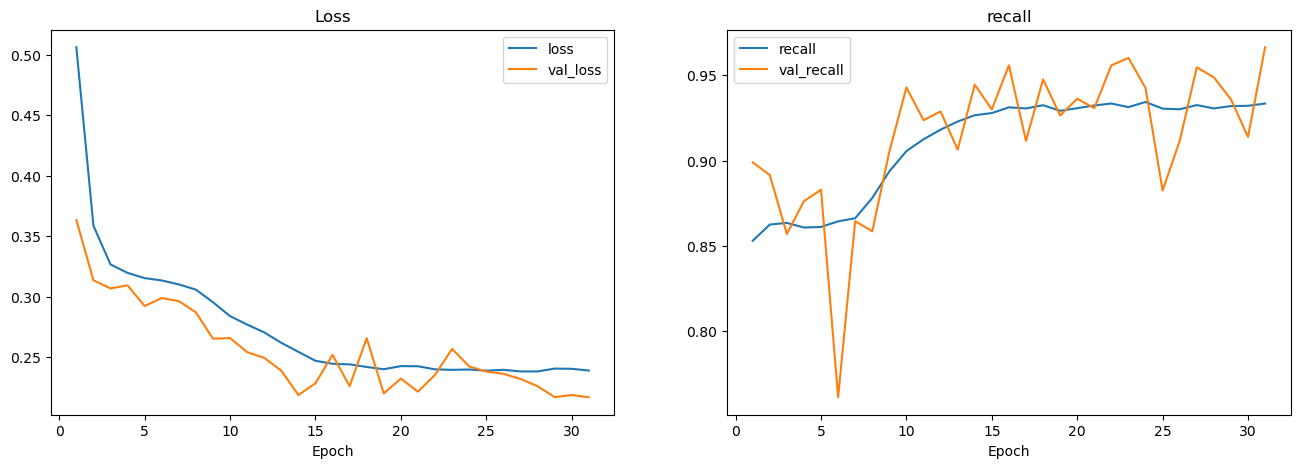

In [275]:
# Evaluate the model
epoch=31

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq2.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history_seq2.history['val_recall'],label='val_recall')
ax[1].set_title('recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

- Setelah ditambahkan jumlah neuron pada hidden layer dan dicoba menggunakan optimizer berbeda, yaitu RMSprop (yang dalam beberapa kasus dapat menghasilkan performa lebih baik daripada optimizer Adam), dapat dilihat bahwa ada peningkatan dari recall dan penurunan nilai loss
- Kecenderungan `overfitting pada model sudah berkurang`, dilihat berdasarkan nilai val recall yang memiliki jarak dengan recall train yang lebih kecil daripada sebelum dilakukan improvisasi, dibuktikan juga dengan `nilai recall yang meningkat` (di atas 0.9) dari sebelumnya
- `Nilai loss` menunjukkan bahwa error pada model berada di bawah 0.25 (`sudah lebih kecil` daripada sebelum improvisasi, yang berarti ada sebaran error kurang dari +/- 0.25 pada nilai prediksi model ini, dengan kecenderungan overfit yang sudah mulai berkurang)

In [298]:
# Model Evaluation of test-set
y_pred_seq2 = model_seq2.predict(X_test_final)
y_pred_seq2 = np.where(y_pred_seq2 >= 0.5, 1, 0)
print (classification_report(y_test, y_pred_seq2))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2553
           1       0.90      0.96      0.93      2999

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



- `Nilai recall sudah meningkat, mencapai 96%` yang berarti model sudah dapat mengurangi resiko kegagalan memprediksi customer yang akan melakukan churn namun diprediksikan tidak melakukan churn, terlebih lagi, sudah lebih bagus daripada sebelum dilakukan improvisasi
- Meskipun presisi bukan point utama penilaian model ini, nilai presisi juga sudah mencapai 90% sehingga kita tidak perlu khawatir akan banyaknya false alarm terhadap customer yang tidak seharusnya kita khawatirkan akan churn

__Kesimpulan model sequential__ : Model ini sudah dapat diterima setelah dilakukan improvisasi, performa model yang meningkat sudah dapat memprediksikan customer yang akan melakukan churn dan menghindari false alarm terhadap customer yang tidak melakukan churn __`(kelebihan)`__, kelebihan lainnya adalah dari segi waktu yang per epoch yang tadinya bisa mencapai 6 ms sekarang hanya 3ms meskipun untuk mendapatkan hasil yang lebih maksimal, dibutuhkan train dengan jumlah epoch sedikit lebih banyak.\
Serta kecenderungan overfitting sudah dapat dikurangi meskipun masih ada sedikit kecenderungan itu __`(kelemahan)`__

### Functional API

- Model yang digunakan adalah Functional API
- Neuron yang digunakan pada input berjumlah 30
- Digunakan 4 layer yaitu input, 2 hidden layer, dan 1 output layer (dengan penambahan jumlah neuron pada hidden layer)
- Fungsi aktivasi yang digunakan adalah relu (fungsi linier yang akan mengeluarkan input secara langsung jika positif, jika tidak, ia akan mengeluarkan nol)
- Optimizer yang digunakan adalah RMSprop (metode optimasi adaptif sering kali sangat bagus, converging dengan cepat ke solusi yang baik, kadang digunakan jika optimizer Adam tidak menghasilkan performa yang baik pada model)
- Callback yang digunakan adalah early stop dengan tingkat kesabaran 3 kali dan memonitoring parameter loss

In [209]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Functional Model
optim_rmsprop= tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    epsilon=1e-07,
    name="RMSprop"
)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
input_layer = Input(shape=(30,))
hidden_layer_1 = Dense(25, activation='relu')(input_layer)
hidden_layer_2 = Dense(80, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional2.compile(loss='binary_crossentropy',
                         optimizer=optim_rmsprop,
                         metrics=tf.keras.metrics.Recall())

In [210]:
%%time

# Train the model
history_func2 = model_functional2.fit(train_pipe,
                                    epochs=100,
                                    validation_data=val_pipe, callbacks=[callback])

Epoch 1/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.3220 - recall: 0.8642 - val_loss: 0.3032 - val_recall: 0.8927
Epoch 2/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.2917 - recall: 0.8767 - val_loss: 0.2838 - val_recall: 0.8609
Epoch 3/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.2760 - recall: 0.8784 - val_loss: 0.2715 - val_recall: 0.8833
Epoch 4/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.2668 - recall: 0.8834 - val_loss: 0.2728 - val_recall: 0.7928
Epoch 5/100
1607/1607 [==============================] - 13s 8ms/step - loss: 0.2626 - recall: 0.8853 - val_loss: 0.2704 - val_recall: 0.9546
Epoch 6/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.2611 - recall: 0.8852 - val_loss: 0.2657 - val_recall: 0.8304
Epoch 7/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.2585 - recall: 0.8901 - val_loss: 0.2666 - val_recall: 0.8899
Epoch 8/100


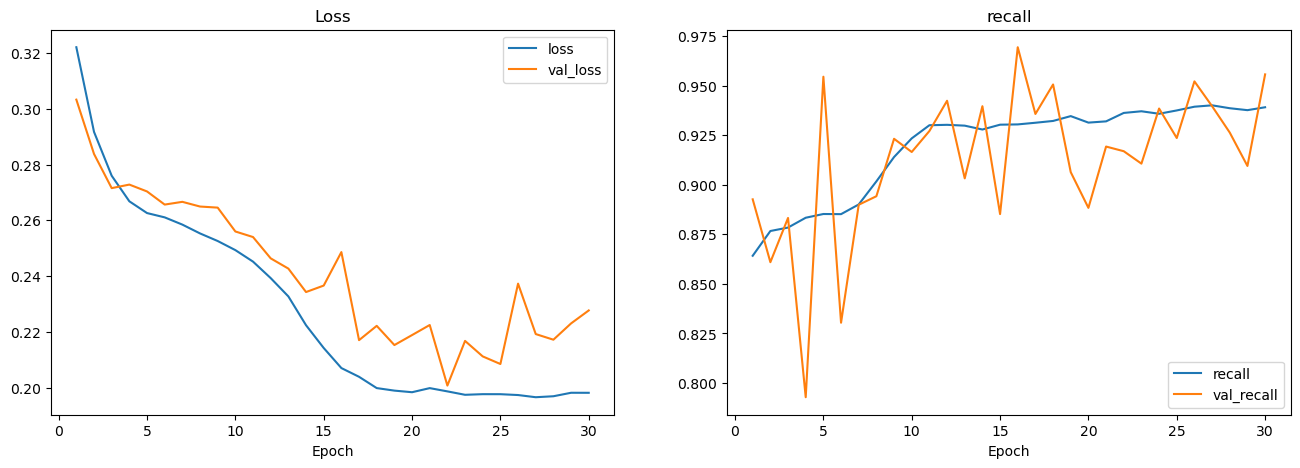

In [211]:
# Evaluate the model
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func2.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func2.history['recall'],label='recall')
ax[1].plot(range(1,epoch+1),history_func2.history['val_recall'],label='val_recall')
ax[1].set_title('recall')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

- Setelah ditambahkan jumlah neuron pada hidden layer dan dicoba menggunakan optimizer berbeda, yaitu RMSprop (yang dalam beberapa kasus dapat menghasilkan performa lebih baik daripada optimizer Adam), dapat dilihat bahwa ada peningkatan dari recall dan penurunan nilai loss serta variance error yang mengecil
- Kecenderungan `overfitting pada model sudah berkurang`, dilihat berdasarkan nilai val recall yang memiliki jarak dengan recall train yang lebih kecil daripada sebelum dilakukan improvisasi, dibuktikan juga dengan `nilai recall yang meningkat` (di atas 0.9) dari sebelumnya
- `Nilai loss` menunjukkan bahwa error pada model berada di bawah 0.25 (`sudah lebih kecil` daripada sebelum improvisasi, yang berarti ada sebaran error kurang dari +/- 0.25 pada nilai prediksi model ini, namun masih overfit)
- Masih cenderung overfit secara keseluruhan namun sudah lebih baik dari segi sebaran error val terhadap train yang sudah lebih kecil daripada sebelum improvisasi

In [165]:
# Model Evaluation of test-set

y_pred_func2 = model_functional2.predict(X_test_final)
y_pred_func2 = np.where(y_pred_func2 >= 0.5, 1, 0)
print (classification_report(y_test, y_pred_func2))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2553
           1       0.92      0.93      0.93      2999

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



- `Nilai recall sudah meningkat, mencapai 93%` yang berarti model sudah dapat mengurangi resiko kegagalan memprediksi customer yang akan melakukan churn namun diprediksikan tidak melakukan churn, terlebih lagi, sudah lebih bagus daripada sebelum dilakukan improvisasi
- Meskipun presisi bukan point utama penilaian model ini, nilai presisi juga sudah mencapai 92% sehingga kita tidak perlu khawatir akan banyaknya false alarm terhadap customer yang tidak seharusnya kita khawatirkan akan churn

__Kesimpulan model functional__ : Model ini sudah lebih bisa diterima setelah dilakukan improvisasi, performa model yang meningkat sudah dapat memprediksikan customer yang akan melakukan churn dan menghindari false alarm terhadap customer yang tidak melakukan churn __`(kelebihan)`__.\
Masih ada kecenderungan overfitting dilihat dari loss val __`(kelemahan)`__

__<i>Kesimpulan Improvisasi Model<i>__ : \
__`Model terbaik`__ yang akan dipakai untuk inference dan deployment adalah __`model_seq2`__, yakni model sequential setelah dilakukan improvisasi menggunakan hyperparameter yang disesuaikan dan menghasilkan performa yang lebih baik dari segi score recall yang meningkat serta kecepatan pemodelan yang lebih baik juga dibandingkan dengan model functional.

##### Saran untuk improvement selanjutnya :
Setelah dilakukan uji terhadap pemodelan dan improvisasi, kami menemukan bahwa penambahan jumlah neuron dapat membantu meningkatkan performa dari model, sehingga kami menyarankan untuk mencoba menambah lagi jumlah neuron yang tepat agar dapat lebih dimaksimalkan lagi. \
\
Pemilihan hyperparameter yang tepat juga dapat mempengaruhi performa model, sehingga kami menyarankan untuk mencoba initializer dan activation function yang lain untuk trial selanjutnya.\
\
Optimizer yang digunakan kali ini adalah RMSprop, untuk model sequential sudah cukup baik namun masih belum maksimal ketika dijadikan hyperparameter dalam model functional, sehingga kami menyarankan untuk mencoba optimizer yang lain atau menurunkan learning rate dalam RMSprop yang diatur ke dalam model functional. Diduga karena learning rate yang tidak sesuai mengakibatkan nilai variance dari validation recall menjadi tidak stabil (naik turun) sehingga perlu dilakukan penyesuaian lagi untuk mendapatkan hasil yang lebih baik.

## Model Saving

In [128]:
# Save the Files

import pickle
import json

with open('m1/imputer_num.pkl', 'wb') as file_1:
    pickle.dump(imputer_num, file_1)
    
with open('m1/imputer_cat.pkl', 'wb') as file_m1:
    pickle.dump(imputer_cat, file_m1)
    
with open('m1/windsoriser.pkl', 'wb') as file_4:
    pickle.dump(windsoriser, file_4)
    
with open('m1/preprocessor.pkl', 'wb') as file_9:
    pickle.dump(preprocessor, file_9)  

with open('m1/num_cols.txt', 'w') as file_5:
    json.dump(num_cols, file_5)

with open('m1/cat_cols.txt','w') as file_6: 
    json.dump(cat_cols, file_6)


In [277]:
# Summary of Model Sequential (improved)

model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 200)               4200      
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2

In [293]:
# Freeze Model

model_seq2.trainable = False
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 200)               4200      
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2

In [297]:
# Save ANN Model

model_seq2.save('m1/churn_model.tf')

INFO:tensorflow:Assets written to: m1/churn_model.tf\assets


## Conclusion

- Lebih banyak customer yang melakukan churn daripada yang tidak dengan customer yang tidak churn cenderung memiliki rata-rata value transaksi yang lebih tinggi
- Customer yang tidak menemukan kenyamanan cenderung tidak bertahan pada produk kami sehingga customer kategori ini lebih banyak melakukan churn daripada yang tidak (terutama untuk yang bukan member dan basic member)
- Member yang bertahan paling banyak untuk tidak churn adalah premium dan platinum (member paling loyal), dengan jumlah feedback yang paling sedikit dibanding kelas member lainnya serta tidak melakukan churn sama sekali. Member kategori ini juga memiliki kecenderungan untuk tidak terlalu sering login dikarenakan sudah tau ingin membeli produk apa karena sudah berlangganan
- Semua customer paling banyak tinggal di town dan city, ini kemungkinan karena akses pengiriman ke village lebih sukar sehingga sangat sedikit customer yang berasal dari village (desa)
- Customer yang tidak joined through referral tidak terlalu aktif login ke website toko
- Didapat model ANN sequential dengan performa recall score 96% setelah dilakukan improvisasi dengan menyesuaikan jumlah neuron pada hidden layer dan mengubah optimizer. Model ANN terbaik ini sudah bisa memprediksi resiko customer yang churn serta menghindari False Alarm dengan baik
- Penambahan neuron, pengaturan optimizer, dan penentuan initializer dapat mempengaruhi improvisasi model sehingga kami sarankan untuk menentukan hyperparameter yang tepat jika ingin melakukan improvisasi lebih lanjut

## Reference

https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241#:~:text=As%20a%20general%20rule%20of,the%20distribution%20is%20approximately%20symmetric.